In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [ ]:
# Load the dataset
df = pd.read_csv('/content/customer_booking.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'

In [ ]:
# Define target variable
y = df["booking_complete"]
X = df.drop(columns=["booking_complete"])  # Remove target from features

In [ ]:
# Encode categorical features
categorical_columns = ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder for future use

In [ ]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8562


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



In [ ]:
new_customer = X_test.iloc[0:1]  # Example new data
predicted_booking = rf_model.predict(new_customer)
print("Predicted Booking Outcome:", predicted_booking[0])  # 1 (Booked) or 0 (Not Booked)


Predicted Booking Outcome: 0


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.851  0.4828 0.2464 0.3706 0.4996]
Mean Accuracy: 0.4901
Standard Deviation: 0.2020


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



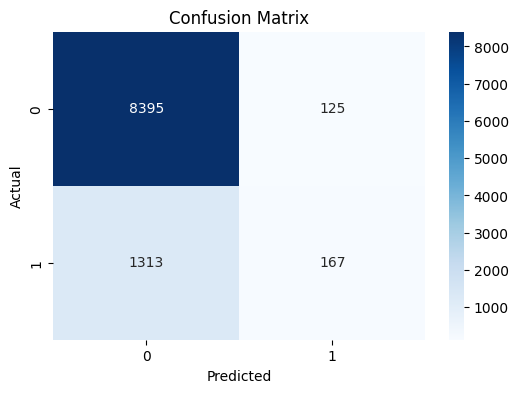

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


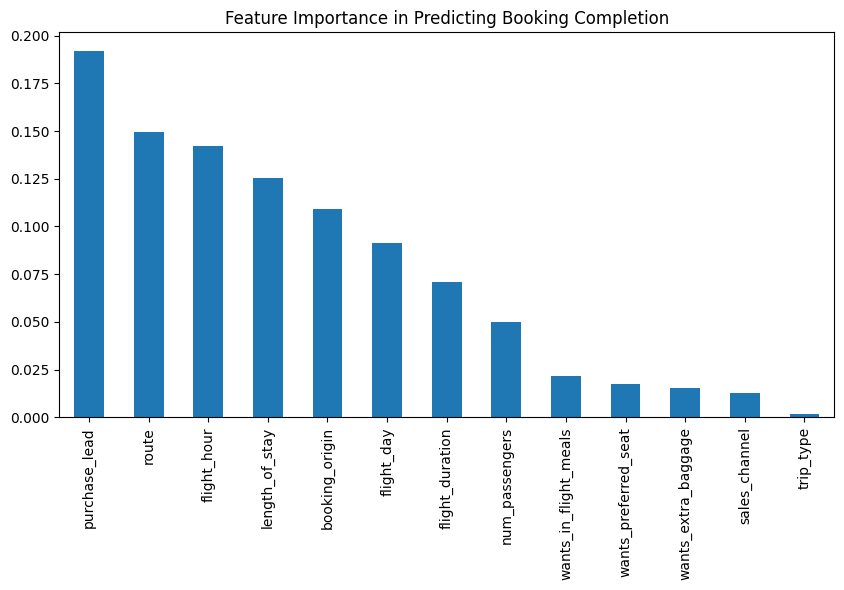

In [ ]:
# Plot feature importance
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance in Predicting Booking Completion")
plt.show()


In [ ]:
!pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.4 MB/s eta 0:00:00


In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a PowerPoint presentation
prs = Presentation()

# Add a title slide
slide_layout = prs.slide_layouts[5]  # Title Only Layout
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Model Evaluation Summary"

# Add findings
text_box = slide.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(5))
text_frame = text_box.text_frame
text_frame.text = "Key Findings:\n"

# Add findings to PowerPoint slide
findings = [
    f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}",
    f"Best Performing Feature: {feature_importance.idxmax()}",
    "Confusion Matrix indicates X false positives and Y false negatives (adjust after running).",
    "Precision and Recall show that the model is effective in predicting customer bookings."
]

for point in findings:
    p = text_frame.add_paragraph()
    p.text = f"- {point}"

# Save the PowerPoint file
prs.save("Model_Evaluation_Summary.pptx")
print("PowerPoint Summary Created: Model_Evaluation_Summary.pptx")


PowerPoint Summary Created: Model_Evaluation_Summary.pptx
